# Laboratorium 9

### 0. Wczytanie danych
Używając metody `load_svmlight_file` z modułu `sklearn` załaduj plik `lab13_files/breast_cancer`, który składa się z 2 elementów: macierzy `X` o wymiarach `683 x 10` oraz wektora `y` o dlugosci `683`. Macierz `X` opisuje badania 683 pacjentow, a wektor `y` ich diagnozy. 

In [1]:
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file('lab13_files/breast-cancer')
X = X.toarray()

In [2]:
type(y)

numpy.ndarray

### 1. Preprocessing
1.1 Korzystajac z `numpy.where` przenumeruj wektor y, tzn zamień wartości 2 i 4 na -1 i +1. 

1.2 Przeskaluj macierz X, tak żeby wartości w każdej kolumnie mieściły się w zakresie [0,1], innymi słowy przeskaluj niezależnie każdą kolumne $X_j$ wg wzoru:


$$
X_j = \frac{X_j-\min(X_j)}{\max(X_j)-\min(X_j)}
$$

In [3]:
import numpy as np
y[np.where(y == 2)] = -1
y[np.where(y == 4)] = 1

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [5]:
X.shape

(683, 10)

### 2. Wizualizacja
Narysuj dane używajac biblioteki `matplotlib`. Użyj wymiarów 1 i 2 z macierzy X, a jako kolory użyj wektora y. Pobaw sie parametrami "s" oraz "alpha" metody `plt.scatter` żeby uzyskać czytelną wizualizacje, np. taką jak poniżej.

<img src="lab13_files/d.png">

<Axes: >

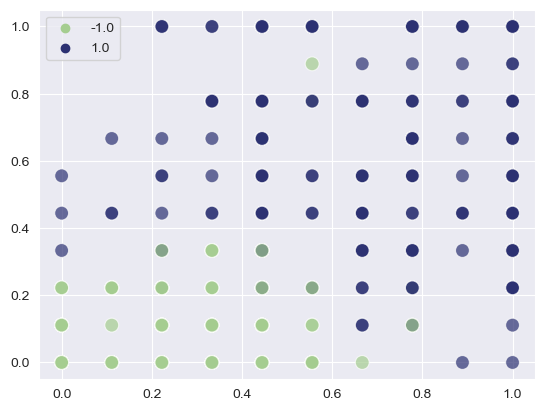

In [8]:
%matplotlib inline
import seaborn as sns
counts = {(k/10,v/10): 0 for k in range(0,10) for v in range(0,10)}
sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y, palette='crest', s=100, alpha=0.7)

### 3. Regresja 

Przeprowadź regresje liniową wg wzoru:
$$
\beta = (X^TX)^{-1}X^Ty
$$

In [11]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(beta)

[-1.13249115 -0.24706384  0.57009103  0.39515016  0.28364289  0.14729084
  0.18073653  0.81355925  0.34444245  0.33313926  0.01678741]


### 4. Wizualizacja Regresji

Zwizualizuj dane po zrzutowaniu na $\beta$ używajac metody `plt.hist`, tzn. narysuj histogramy $\beta X_+$ oraz
$\beta X_-$ gdzie $X_+$ to wiersze $X$ dla których $y=+1$ i analogicznie $X_-$. Postaraj się wygenerować czytelny wykres podobny do tego poniżej.

<img src="lab13_files/lr1.png">

<Axes: ylabel='Count'>

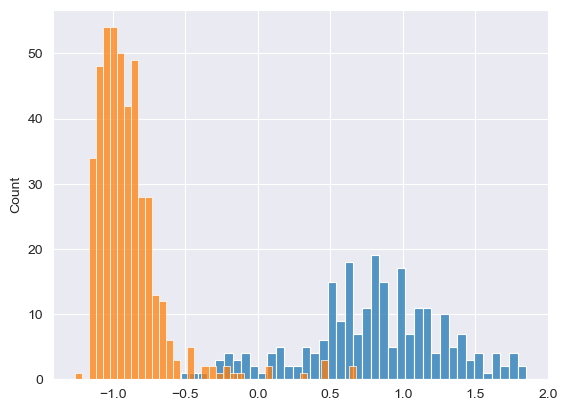

In [13]:
X_plus = X_b[y == 1] @ beta
X_minus = X_b[y == -1] @ beta

sns.histplot(X_plus,bins=40)
sns.histplot(X_minus,bins=40)

### 5. Klasyfikacja

Przeprowadź "klasyfikacje" naszych pacjentów, ci, którzy zostali zrzutowani na wartość ujemną dostają etykiete $-1$, a ci którzy na wartość dodatnia - etykiete $+1$

In [14]:
pred = X_b @ beta
pred[np.where(pred > 0)] = 1
pred[np.where(pred <= 0)] = -1
print(pred)

[-1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.
  1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1.  1.  1.  1.
  1. -1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1.  1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1. -1.  1.
 -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1.
  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.
 -1.  1. -1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1.
 -1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.
  1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1. -1. -1.
 -1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1. -1.  1.
 -1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1.
 -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1.  1

### 6. Ewaluacja

Policz jak dokładny jest ten model, tzn. jak duży jest zbiór
$ \{ (x_i,y_i) : \mathrm{sign}(\beta x_i) = y_i \} $
w stosunku do rozmiaru całego $y$

Powinno udać się uzyskać wynik na poziomie 93-94%

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,pred))

0.9604685212298683


### 7. Regularyzacja 
Dodaj parametr `C` do regresji liniowej
$$
\beta = (X^TX + \tfrac{1}{C}I)^{-1}X^Ty
$$

gdzie $I$ - macierz identyczności. 

Dla jakiej wartości `C` wynik jest najlepszy? Jaki wynik udało Ci sie uzyskać?

In [26]:
c_vals = np.linspace(0.00001,1,1000)
best_acc, res = 0,0
for c in c_vals:
    beta = np.linalg.inv(X_b.T.dot(X_b) + 1/c * np.eye(X_b.shape[1])).dot(X_b.T).dot(y)
    pred = X_b @ beta
    pred[np.where(pred > 0)] = 1
    pred[np.where(pred <= 0)] = -1
    acc = accuracy_score(y,pred)
    if acc > best_acc:
        best_acc = acc
        res = c

print(best_acc)
print(res)

0.9736456808199122
1e-05


### 8. Gratulacje
Właśnie stworzyłeś/-aś swój pierwszy klasyfikator (statystyczny model predykcji). 

Spróbuj zastosować go do innych danych.

### Zadanie dodatkowe

Zaimplementuj powyższą metode jako klase `LRClassifier` wyposażoną w następujące metody:

* konstruktor przyjmujący dwa parametry: 
    * `C` - stała z równania 
    * `scale` - zmienna boolowska (domyslnie `True`) która określa czy macierz `X` ma byc automatycznie znormalizowana (przeskalowana do `[0,1]`)
* `.fit(X, y)` która spowoduje obliczenie $\beta$, dla `X` - dowolnej macierzy, `y` - wektora etykiet skladajacego sie z dwóch unikalnych wartosci (mogą to byc np. 2 różne stringi)
* `.predict(X)`, która zwróci wektor zawierajacy na `i`tej pozycji etykiete "przewidzianą" przez nasz model (pamiętaj o skalowaniu jesli `scale==True`!)

Przykladowe użycie:

    clf = LRClassifier(C=100)
    Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
    yt = np.array(['x', 'x', 'y', 'y', 'y'])
    clf.fit(Xt, yt)
    X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
    print(clf.predict(X)) # ['x', 'x', 'y']

In [49]:
class LRClassifier:

    def __init__(self, C, scale=True):
        self.sc = MinMaxScaler()
        self.C = C
        self.scale = scale

    def fit(self, X, y):
        if self.scale: X = self.sc.fit_transform(X)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.code = {'x': -1, 'y': 1, -1:'x', 1:'y'}
        y = np.array(list(map(lambda y: self.code[y], y)))
        self.beta = np.linalg.inv(X_b.T.dot(X_b) + 1/self.C * np.eye(X_b.shape[1])).dot(X_b.T).dot(y)

    def predict(self, X):
        if self.scale: X = self.sc.transform(X)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        pred = X_b @ self.beta
        pred[np.where(pred > 0)] = 1
        pred[np.where(pred <= 0)] = -1
        return list(map(lambda y: self.code[int(y)],pred))

clf = LRClassifier(C=100)
Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
yt = np.array(['x', 'x', 'y', 'y', 'y'])
clf.fit(Xt, yt)
X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
print(clf.predict(X))

['x', 'x', 'y']
